<a href="https://colab.research.google.com/github/CUKykkim/hdfs/blob/main/bigdata_processing_4th_week_HDFS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDFS 실습

**HDFS 를 Docker 환경에 설치하기 위해 몇가지 설치해야할 사항이 있습니다.**

1. git 설치
1. hadoop 설치



## git client 설치

**git 은 소스 코드 형상관리 툴로써, 자신이 개발한 소스코드 뿐만 아니라 타인이 개발한 소스 코드를 공유받아 공동으로 개발할 수 있습니다. 우리는 실습에서 미리 잘 설치된 Hadoop 시스템의 도커 이미지를 내려 받기 위해 git을 활용할 것입니다.**

1. 먼저 git을 설치 파일 다운받기 위해 https://git-scm.com/downloads 로 이동합니다.

2. 자신의 운영체제에 맞게 설치 파일을 다운 받습니다.

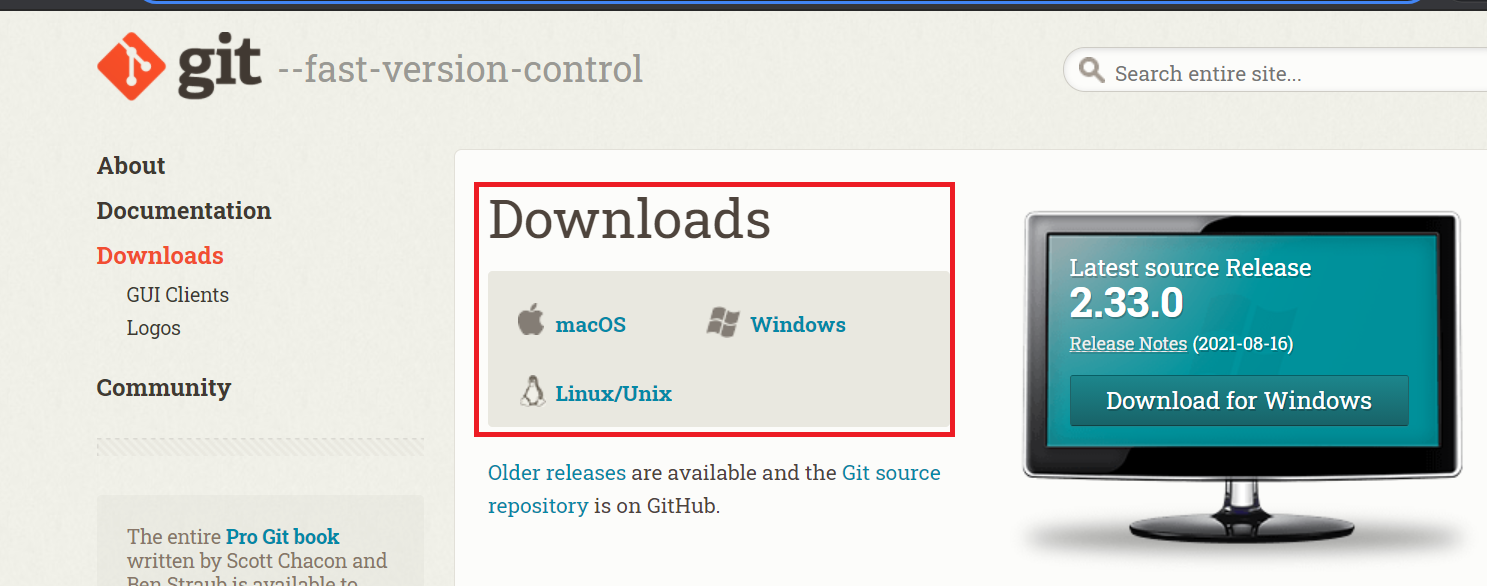

3. 다운 받은 설치 파일을 열어 Next 버튼을 계속 눌러 설치를 진행합니다.

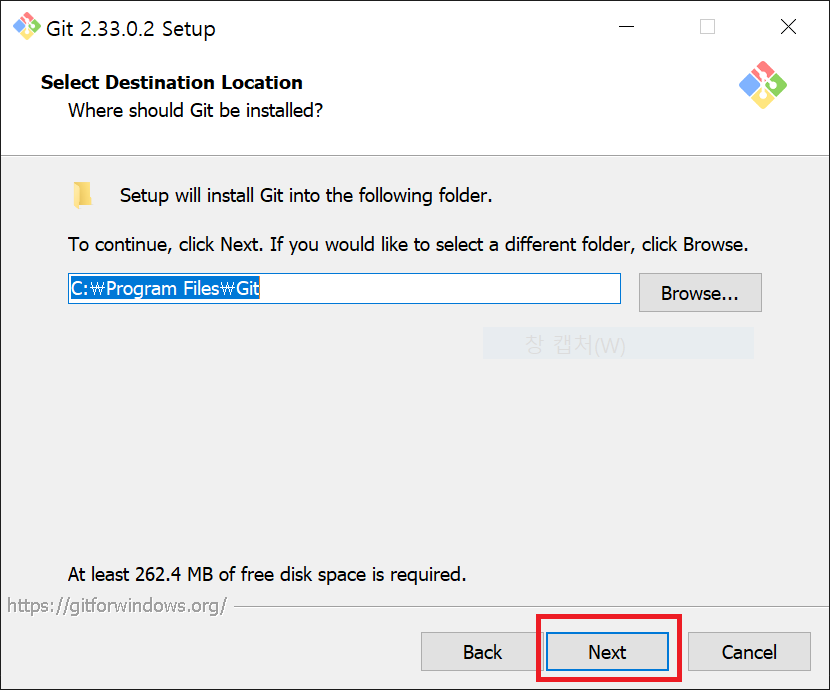

4. 설치가 완료 되면 finish 버튼을 눌러 설치를 완료합니다.

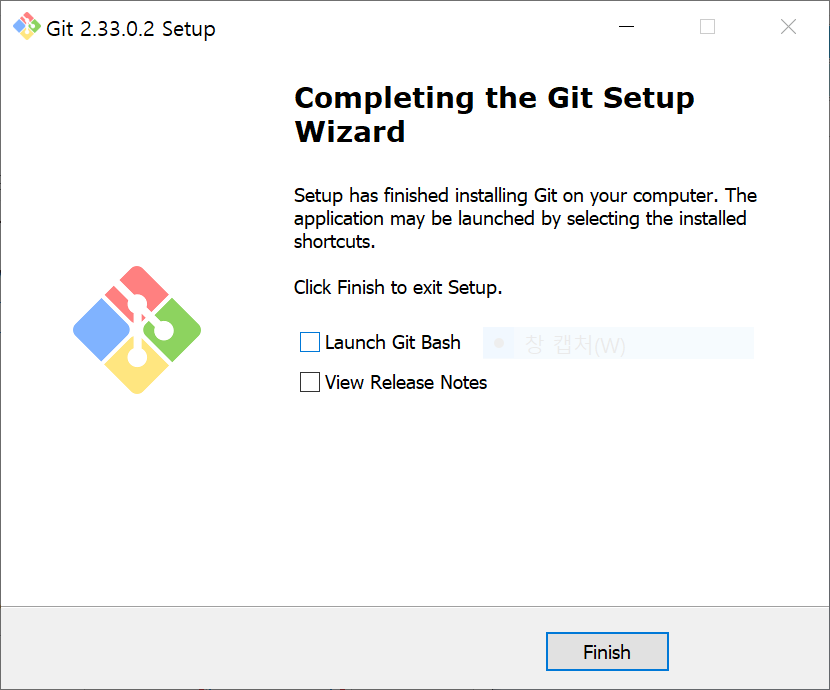

5. widnows 터미널을 열어 git 설치가 완료 되었는지를 테스트 합니다. 

아래와 같이 git version 을 눌러 정상적으로 git의 버전 정보가 나온다면 성공적으로 설치가 된 것입니다.

```
git version
```
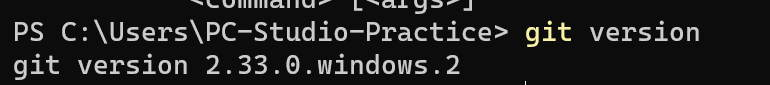


## Hadoop 설치

**도커 기반의 Hadoop을 다운 받기 위해 Windows 상에서 terminal을 열어 실습을 하기 위한 적당한 디렉토리를 만든다.**

```
mkdir hadoop
```

```
cd hadoop
```








**다음 git 명령어로 소스 코드를 가지고 온다.**

```
git clone https://github.com/CUKykkim/docker-hadoop.git
```

**다음 명령어를 통해 hadoop 컨테이너를 수행시킨다.**

```
docker compose up
```



탭을 추가로 하나 더 연 다음 hadoop 시스템이 컨테이너 형태로 잘 수행중인지를 확인한다

```
docker ps
```

```
      CONTAINER ID   IMAGE                                                    COMMAND                  CREATED              STATUS                        PORTS                                                                                  NAMES
aad19461f375   bde2020/hadoop-namenode:2.0.0-hadoop3.2.1-java8          "/entrypoint.sh /run…"   About a minute ago   Up About a minute (healthy)   0.0.0.0:9000->9000/tcp, :::9000->9000/tcp, 0.0.0.0:9870->9870/tcp, :::9870->9870/tcp   namenode
786eb7eca4ce   bde2020/hadoop-nodemanager:2.0.0-hadoop3.2.1-java8       "/entrypoint.sh /run…"   About a minute ago   Up About a minute (healthy)   8042/tcp                                                                               nodemanager
57aa8d6de905   bde2020/hadoop-datanode:2.0.0-hadoop3.2.1-java8          "/entrypoint.sh /run…"   About a minute ago   Up About a minute (healthy)   9864/tcp                                                                               datanode
72fc4614f0bf   bde2020/hadoop-historyserver:2.0.0-hadoop3.2.1-java8     "/entrypoint.sh /run…"   About a minute ago   Up About a minute (healthy)   8188/tcp                                                                               historyserver
5e746640e957   bde2020/hadoop-resourcemanager:2.0.0-hadoop3.2.1-java8   "/entrypoint.sh /run…"   About a minute ago   Up About a minute (healthy)   8088/tcp                                                                               resourcemanager
```

## HDFS 명령어 수행

**이전에 수행한 하둡 시스템의 Namenode 컨테이너 내부로 진입한다.**

```
docker exec -it namenode /bin/bash
```



NodeManager 컨테이너로 진입하면 쉘 입력창이 #로 바뀌는 것을 확인할 수 있다.

```
root@786eb7eca4ce:~#
```

HDFS dfs -ls / 명령어를 통해 root 디렉토리에 어떤 파일이 있는지를 확인 할 수 있다.

```
hdfs dfs -ls /
```

HDFS dfs -mkdir 명령어로 디렉토리를 생성해 본다.

```
hdfs dfs -mkdir cuk/
```

HDFS dfs -copyFromLocal 명령어로 로컬 시스템에 있는 파일을 하둡 파일 시스템으로 복사한다.

```
hdfs dfs -copyFromLocal /entrypoint.sh /cuk
```

HDFS dfs -cat 명령어로 하둡파일 시스템으로 복사한 파일을 읽어본다.

```
hdfs dfs -cat /entrypoint.sh /cuk/entrypoint.sh
```

나머지HDFS 명령들도 사용해 본다.

```
hdfs dfs -rm /cuk/entrypoint.sh
```

```
hdfs dfs -rmdir /cuk
```

## 하둡 시스템 종료하기

기존 git을 통해 다운 받은 하둡 소스 코드가 있는 디렉토리 내로 이동하여 docker-compose down 명령어를 통해 하둡 시스템을 종료한다.

```
docker compose down
```